##                               LAMINI Narimene - GUETTAF Sarah - G4

# TP 3 Regression linéaire
Dans ce TP, nous aimerions prédire l'admission d'un étudiant à une specialité donnée selon ses notes dans deux matières.

Pour ce faire, nous étudierons un ensemble de données avec l'admission  (y) et les notes des deux modules (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [2]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=int)
data.shape

(100, 3)

Dans ces données (data), la première colonne represente la première note, la deuxieme colonne la deuxième note et la troisième colonne represente l'admission à la specialité (1 admis 0 non admis).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [3]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0:2]))
y = data[:, 2];

In [4]:
print('X', X.shape ,' y ', y.shape)

X (100, 3)  y  (100,)


# Descente du Gradient : Préparation des fonctions

0- Fonction logistique (Sigmoid)

In [5]:
def sigmoid(z):
    # pour une valeur donnée, cette fonction calculera sa sigmoid
    return 1 / (1 + np.exp(-z))


1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [6]:
def computeCost(X, y, theta):
    
    z = np.dot(X,theta)
    first = y.T.dot(np.log(sigmoid(z)))
    second = ((1-y).T).dot(np.log(1-sigmoid(z)))
    cost = -((first + second))/len(y) 
 
    return  cost


2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [7]:
def gradientDescent(X, y, theta, alpha,iterations):
   
    length = len(y)
    temp = np.zeros((iterations,1))
    for i in range(iterations):
        theta = theta - (alpha/length) * np.dot(X.T, np.dot(X, theta)-y.reshape((length,1)))
        temp[i] = computeCost(X,y,theta)
    cost = temp
    
    return theta, cost

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [8]:
n=X.shape[1]
theta = np.zeros((n, 1))
theta


array([[0.],
       [0.],
       [0.]])

Calculer le cout initial

In [9]:
initialCost=computeCost(X, y, theta)
print("Initial cost is : ", initialCost )

Initial cost is :  [0.69314718]


Normalisation des données

In [10]:
y_norm=np.ones(y.shape)
std = np.std(y)
mu = np.mean(y)
y_norm = np.true_divide((y- mu),std)

X_norm=np.ones(X.shape)
for i in range(1,X.shape[1]):
    std = np.std(X[:,i])
    mu = np.mean(X[:,i])
    X_norm[:,i] = np.true_divide((X[:,i]- mu),std)

Appel des la fonction de calcul du gradient

In [11]:
# paramètres
iterations = 1000;
alpha = 0.01;
# Appel de la fonction gradientDescent prenant les données normalisés en paramètre
theta, cost= gradientDescent(X_norm, y_norm, theta, alpha, iterations)
print("new theta is :\n",theta)
print("")
print("new cost is :\n",cost)


new theta is :
 [[9.46076550e-17]
 [5.85674934e-01]
 [5.21143056e-01]]

new cost is :
 [[0.68730057]
 [0.68152509]
 [0.67581976]
 [0.67018365]
 [0.66461579]
 [0.65911528]
 [0.65368119]
 [0.64831262]
 [0.64300868]
 [0.63776851]
 [0.63259123]
 [0.62747601]
 [0.62242199]
 [0.61742837]
 [0.61249432]
 [0.60761905]
 [0.60280177]
 [0.5980417 ]
 [0.59333807]
 [0.58869014]
 [0.58409716]
 [0.57955839]
 [0.57507312]
 [0.57064063]
 [0.56626023]
 [0.56193123]
 [0.55765295]
 [0.55342471]
 [0.54924586]
 [0.54511575]
 [0.54103374]
 [0.5369992 ]
 [0.53301151]
 [0.52907005]
 [0.52517423]
 [0.52132345]
 [0.51751712]
 [0.51375466]
 [0.51003552]
 [0.50635912]
 [0.50272492]
 [0.49913238]
 [0.49558095]
 [0.49207012]
 [0.48859935]
 [0.48516815]
 [0.481776  ]
 [0.4784224 ]
 [0.47510687]
 [0.47182893]
 [0.46858809]
 [0.46538389]
 [0.46221586]
 [0.45908356]
 [0.45598652]
 [0.45292431]
 [0.44989649]
 [0.44690264]
 [0.44394232]
 [0.44101512]
 [0.43812062]
 [0.43525843]
 [0.43242814]
 [0.42962936]
 [0.42686169]
 [0

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

# Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données

In [12]:
def drawLine():
    decision_boundary= -(theta[0] + (theta[1]/100 ) *X_norm[:,1])/(theta[2]/100)
    plt.plot(X_norm[:,1],decision_boundary, color="red")
    

# Affichage 
Graphe representant les acceptations selon les caracteristiques

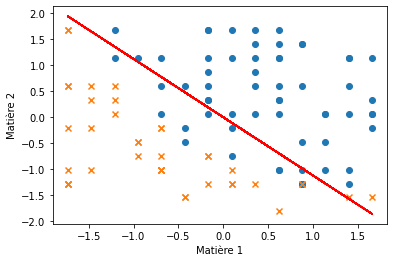

In [13]:
plt.scatter(X_norm[np.where(y==1),1],X_norm[np.where(y==1),2], label="Admis",marker ='o')
plt.scatter(X_norm[np.where(y==0),1],X_norm[np.where(y==0),2], label="Ajourné",marker ='x')

plt.xlabel('Matière 1')
plt.ylabel('Matière 2') 
drawLine()

Traçage du coût en fonction de theta0 , theta1 et theta 2

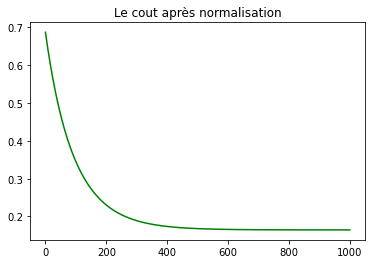

In [14]:
plt.plot(range(iterations), cost, label= 'Le cout après normalisation', color = "green")
plt.title('Le cout après normalisation')
plt.show()

Prédire des valeurs de y

In [15]:
# Predire pour des notes note1= 9 et note2=17

#normalisation
std1 = np.std(X[:,1])
mu1 = np.mean(X[:,1])
std2 = np.std(X[:,2])
mu2 = np.mean(X[:,2])
std3 = np.std(y)
mu3 = np.mean(y)
x1_norm =(9- mu1)/std1
x2_norm =(17- mu2)/std2
#prédiction
predict_norm = np.matmul([1, x1_norm,x2_norm],theta_norm);
predict = ['Admis'  if (predict1_norm*std3)+mu3 > 0.5 else 'Ajourné']
print("L'étudiant est",predict)


NameError: name 'theta_norm' is not defined

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [16]:
#predection en utilisant la librairie sklearn 
model = LogisticRegression()
y_pred = model.fit(X_norm,y).predict(X_norm)

print('Result 01 :\n')
print(classification_report(y, y_pred))

print("======================================================================================")

#predection en utilisant notre modèle
y_pred = np.dot(X_norm, theta)
predicted = [1  if (i*std3)+mu3 > 0.5 else 0 for i in y_pred]
print('Result 02 :\n')
print(classification_report(y, predicted))



Result 01 :

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        40
           1       0.90      0.93      0.92        60

    accuracy                           0.90       100
   macro avg       0.90      0.89      0.89       100
weighted avg       0.90      0.90      0.90       100

Result 02 :

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        40
           1       0.90      0.93      0.92        60

    accuracy                           0.90       100
   macro avg       0.90      0.89      0.89       100
weighted avg       0.90      0.90      0.90       100



### Analyse des résultats
- Le premier graphe represente les acceptations selon les caracteristiques. après avoir bien conçu notre modèle d'apprentissage en calculant théta0, théta1 et théta2, on a réussi à déssiner la ligne qui sépare les données de la classe 1 (Admis) et de la classe 2 (Ajourné). 
- Le 2 ème graphe montre la courbe du coût en fonction de theta0,theta1 et théta 2, on voit bien que cette dernière commence à se stabiliser avec un nombre d'itérations = 400 et un cout minimal égale à 0.16446122. Donc 400 itérations suffisent pour avoir le cout minimal. 
- Les statistiques obtenus par le modèle prédéfinie LogisticRegression() de sklearn sont identiques à ceux otenus par notre modèle, Ce qui confirme l'effecacité de ce dernier pour classer de nouvelles données.

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

- Trouver le nombre d'itérations auquel le cout se stabilise et le fixer comme la valeur maximale d'itérations
- Nettoyage du dataset avant de concevoir le modèl (data cleaning)
- Dévision des données en données d'entrainement et données de test
- Selection des caractéristiques fortement reliées avec la sortie ( Features selection) dans le cas ou on a plusieurs caractéristiques.

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 25 Mars 2022 à 22h


# Bonne chance